---

# Data Analysis on Global Terrorism

```
데이터: Global Terrorism Database
• https://www.kaggle.com/START-UMD/gtd
• 1970년대부터 2010년대까지 전세계 테러관련된 데이터입니다.
• https://www.kaggle.com/ash316/terrorism-around-the-world
• 135개의 컬럼이 존재합니다.
• 해당 데이터에는 테러가 발생한 시점, 공격형태(암살, 폭탄 등등), 국가,
지역(동아시아, 유럽, 등등), 부상자, 사망자, 테러의 발생 위도, 경도 정보
등등이 있습니다.
```

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import set_matplotlib_hangul # 이건 내가 만든 것
%matplotlib inline

import time
import re
import warnings
warnings.simplefilter(action='ignore') # 경고문구 무시

Hangul OK in your Windows!


In [6]:
terror_data = pd.read_csv('./globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
terror_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [15]:
terror_data = terror_data[["eventid","iyear", "imonth", "iday","extended","resolution", "country", "country_txt", "region","region_txt","provstate" \
,"city","latitude","longitude","crit1","crit2","crit3","multiple","success","suicide","attacktype1","attacktype1_txt","attacktype2" \
,"attacktype2_txt", "targtype1","targtype1_txt","targsubtype1","targsubtype1_txt", "gname","gsubname","gname2","gsubname2", "weaptype1" \
,"weaptype1_txt","weapsubtype1","weapsubtype1_txt","nkill","nkillus","nkillter","nwound","nwoundus","nwoundte","property","propextent" \
,"propextent_txt", "propvalue", "ishostkid", "nhostkid"]]

In [131]:
terror_data['count'] = 1

In [132]:
terror_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   resolution        2220 non-null    object 
 6   country           181691 non-null  int64  
 7   country_txt       181691 non-null  object 
 8   region            181691 non-null  int64  
 9   region_txt        181691 non-null  object 
 10  provstate         181270 non-null  object 
 11  city              181257 non-null  object 
 12  latitude          177135 non-null  float64
 13  longitude         177134 non-null  float64
 14  crit1             181691 non-null  int64  
 15  crit2             181691 non-null  int64  
 16  crit3             18

In [133]:
terror_data.isnull().sum()

eventid                  0
iyear                    0
imonth                   0
iday                     0
extended                 0
resolution          179471
country                  0
country_txt              0
region                   0
region_txt               0
provstate              421
city                   434
latitude              4556
longitude             4557
crit1                    0
crit2                    0
crit3                    0
multiple                 1
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
attacktype2         175377
attacktype2_txt     175377
targtype1                0
targtype1_txt            0
targsubtype1         10373
targsubtype1_txt     10373
gname                    0
gsubname            175801
gname2              179678
gsubname2           181531
weaptype1                0
weaptype1_txt            0
weapsubtype1         20768
weapsubtype1_txt     20768
nkill                10313
n

```
문제1)
• 먼저 데이터의 전체 기간에서 테러의 숫자를 연도별로 집계하여 연도별
테러 숫자를 시각화하시오.
• 시각화를 해보면 전세계 테러는 어떤 특정 연도를 기점으로 갑자기 급격히
증가합니다. 이 구간을 특정짓고 그 “기점”에 세계적 이슈가 무엇이
있었는지를 추측해보세요
• 단, 위 추측은 현단계에서는 단지 아직은 “상상”일 뿐입니다.
```

### Number of Terrors

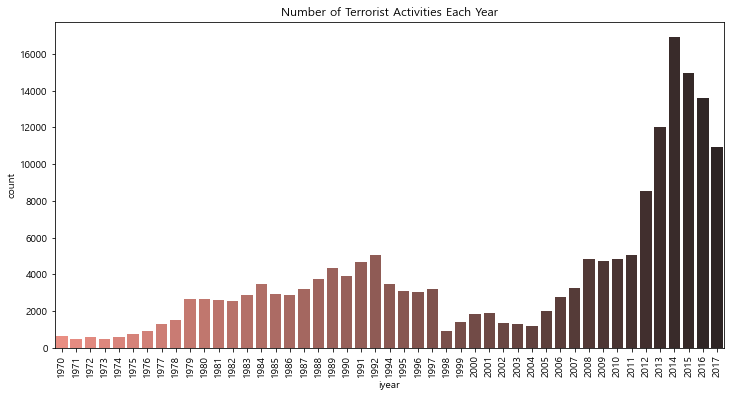

In [355]:
# number of terrors
# iyear: the year in which the incident occurred
plt.subplots(figsize=(12,6))
sns.countplot('iyear', data=terror_data, palette='dark:salmon_r')
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Year')
plt.show();

- 2012년부터 테러 건수가 급격히 증가
- 아프가니스탄, 파키스탄, 이라크 등
- 탈레반, 보코하람, 알카에다이라크지부, 알샤바브
- 중동 지역에서 수니/시아파 간 분쟁 증가, 정정 불안, 전쟁 도구로 테러 활용, 경제 문제에 대한 불만 고조 등
- 2011년 아랍의 봄(중동 및 아프리카 지역의 민주화 운동) 이후 IS 등 극단주의 무장 조직의 수 증가
- 아랍의 봄 이전 독재 정권에 억눌려 있던 극단주의 세력이 민주화 바람과 함께 내전 등으로 혼란 상태가 지속되며 치안이 약해진 틈을 타 세력 확장

### Fatalities

In [359]:
terror_data['nkillvictim'] = terror_data['nkill']-terror_data['nkillter']
terror_data.head(2)

,eventid,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,...,nwoundte,property,propextent,propextent_txt,propvalue,ishostkid,nhostkid,count,year_range,nkillvictim
0,197000000001,1970,7,2,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,0,NaN,NaN,NaN,0.0,NaN,1,1970s,NaN
1,197000000002,1970,0,0,0,NaN,130,Mexico,1,North America,...,NaN,0,NaN,NaN,NaN,1.0,1.0,1,1970s,NaN


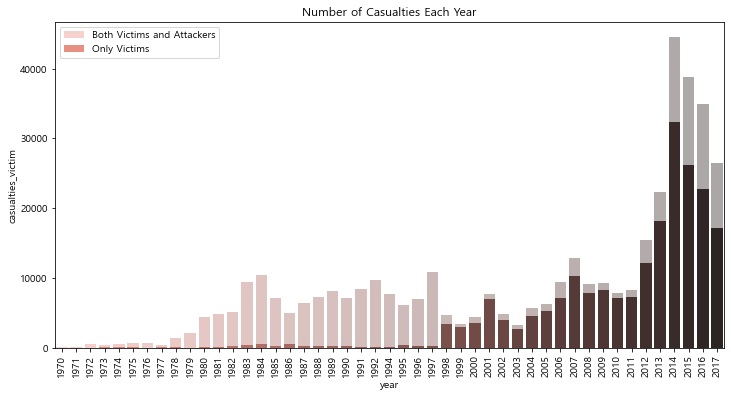

In [383]:
# number of fatalities

plt.subplots(figsize=(12,6))

# number of fatalities (both victims and attackers)
yearly_casualties = terror_data.groupby('iyear')['nkill'].sum().to_frame().reset_index()
yearly_casualties.columns = ['year','casualties']
sns.barplot(x=yearly_casualties.year, y=yearly_casualties.casualties, palette='dark:salmon_r', alpha=0.4, label='Both Victims and Attackers')

# number of fatalities (only victims)
yearly_casualties_victim = terror_data.groupby('iyear')['nkillvictim'].sum().to_frame().reset_index()
yearly_casualties_victim.columns = ['year','casualties_victim']
sns.barplot(x=yearly_casualties_victim.year, y=yearly_casualties_victim.casualties_victim, palette='dark:salmon_r', label='Only Victims')

plt.xticks(rotation=90)
plt.title('Number of Casualties Each Year')
plt.legend()
plt.show();

### Injured

In [368]:
terror_data['nwoundvictim'] = terror_data['nwound']-terror_data['nwoundte']
terror_data.head(2)

,eventid,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,...,property,propextent,propextent_txt,propvalue,ishostkid,nhostkid,count,year_range,nkillvictim,nwoundvictim
0,197000000001,1970,7,2,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,0,NaN,NaN,NaN,0.0,NaN,1,1970s,NaN,NaN
1,197000000002,1970,0,0,0,NaN,130,Mexico,1,North America,...,0,NaN,NaN,NaN,1.0,1.0,1,1970s,NaN,NaN


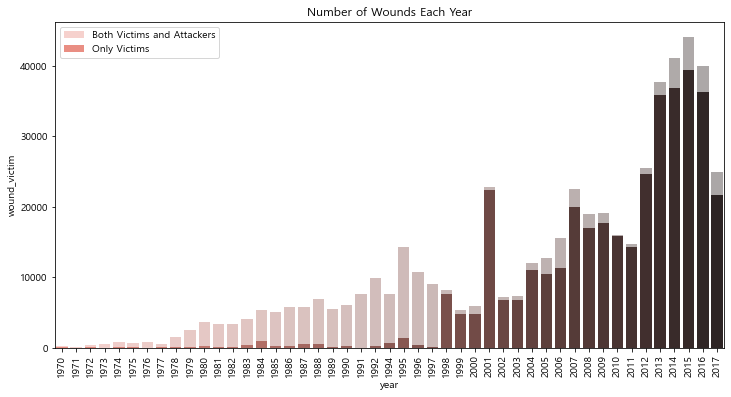

In [382]:
# number of injured

plt.subplots(figsize=(12,6))

# number of injured (both victims and attackers)
yearly_wounds = terror_data.groupby('iyear')['nwound'].sum().to_frame().reset_index()
yearly_wounds.columns = ['year','wound']
sns.barplot(x=yearly_wounds.year, y=yearly_wounds.wound, palette='dark:salmon_r', alpha=0.4, label='Both Victims and Attackers') #alpha: 투명도

# number of injured (only victims)
yearly_wounds_victim = terror_data.groupby('iyear')['nwoundvictim'].sum().to_frame().reset_index()
yearly_wounds_victim.columns = ['year','wound_victim']
sns.barplot(x=yearly_wounds_victim.year, y=yearly_wounds_victim.wound_victim, palette='dark:salmon_r', label='Only Victims')

plt.xticks(rotation=90)
plt.title('Number of Wounds Each Year')
plt.legend()
plt.show();

### Suicide

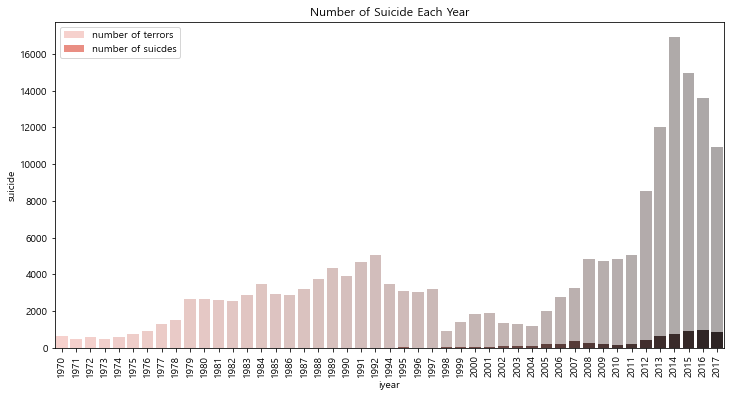

In [391]:
# number of suicides
plt.figure(figsize=(12,6))

# number of terrors
yearly_terror = terror_data.groupby('iyear')['count'].sum().to_frame().reset_index()
sns.barplot(x=yearly_terror.iyear, y=yearly_terror['count'], palette='dark:salmon_r', label='number of terrors', alpha=0.4)
# number of suicides
n_suicide = terror_data.groupby('iyear')['suicide'].sum().to_frame().reset_index()
sns.barplot(x=n_suicide.iyear, y=n_suicide.suicide, palette='dark:salmon_r', label='number of suicdes')

plt.xticks(rotation=90)
plt.title('Number of Suicide Each Year')
plt.legend()
plt.show();

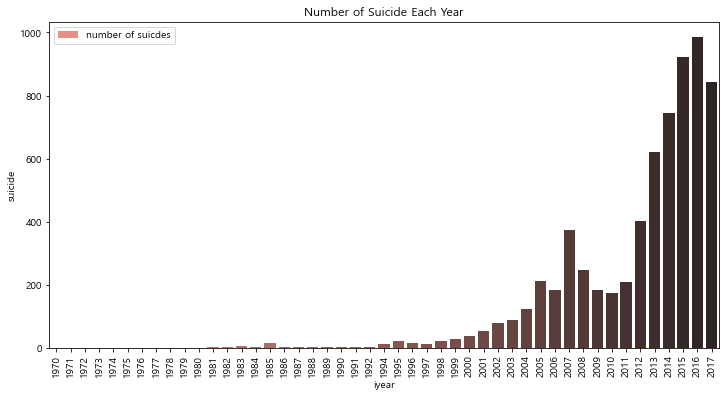

In [392]:
# number of suicide
plt.figure(figsize=(12,6))
n_suicide = terror_data.groupby('iyear')['suicide'].sum().to_frame().reset_index()
sns.barplot(x=n_suicide.iyear, y=n_suicide.suicide, palette='dark:salmon_r', label='number of suicdes')
plt.xticks(rotation=90)
plt.title('Number of Suicide Each Year')
plt.legend()
plt.show();

- 전체 테러 중 자살 폭탄 테러의 비중이 크다고 볼 수는 없지만, 그 빈도수는 과거에 비해 급격히 증가하였다.

### Number of Successful Terrorist Strikes

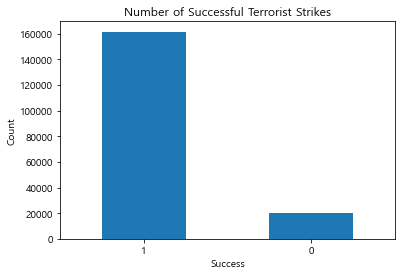

In [405]:
# Success of Terrorist Strike
# 1: The incident was successful. 
# 0: The incident was not successful.
terror_data['success'].value_counts().plot(kind='bar')
plt.title('Number of Successful Terrorist Strikes')
plt.xlabel('Success')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show();

### Number of Extended Terrorist Attacks

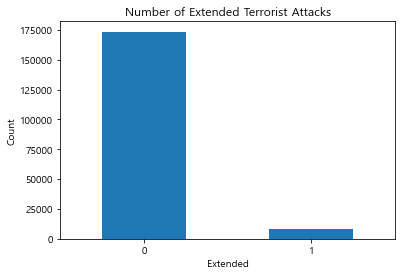

In [404]:
# Number of Extended Terrorist Attacks
# 1: The duration of an incident extended more than 24 hours
# 0: The duration of an incident extended less than 24 hours.
terror_data['extended'].value_counts().plot(kind='bar')
plt.title('Number of Extended Terrorist Attacks')
plt.xlabel('Extended')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show();

In [467]:
terror_data.groupby('extended')['nkillvictim'].sum()

extended
0    197784.0
1     17377.0
Name: nkillvictim, dtype: float64

In [468]:
terror_data['extended'].value_counts()

0    173452
1      8239
Name: extended, dtype: int64

In [497]:
# average number of killed victims by 'extended'
avg_nkillvictim_extended = terror_data.groupby('extended')['nkillvictim'].sum() / terror_data['extended'].value_counts()
avg_nkill_extended = terror_data.groupby('extended')['nkill'].sum() / terror_data['extended'].value_counts()

pd.concat([avg_nkillvictim_extended.rename('avg_nkillvictim_extended'), avg_nkill_extended.rename('avg_nkill_extended')], axis=1)

,avg_nkillvictim_extended,avg_nkill_extended
extended,,
0,1.140281,2.231171
1,2.109115,3.018206


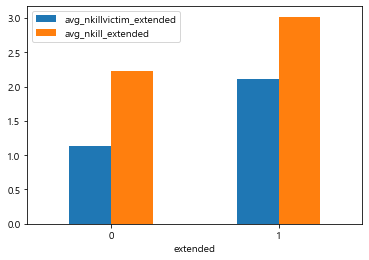

In [501]:
pd.concat([avg_nkillvictim_extended.rename('avg_nkillvictim_extended'), avg_nkill_extended.rename('avg_nkill_extended')], axis=1).plot(kind='bar')
plt.xticks(rotation=0)
plt.show();

- 24시간 이상 지속된 테러 공격으로 인한 피해가 24시간 미만의 테러 공격보다 더 높은 평균 사상자를 냈다.
- 24시간 미만 테러 공격으로는 평균적으로 1.1명의 사상자(only victims)가 발생하였지만, 24시간 이상 지속된 테러 공격은 평균 2.1명의 사상자(only victims)가 발생했다.
- victims와 attackers 모두 합쳐서는 각각 평균 2.2명, 3.0명의 사상자(both victism and attackers가 발생했다.

```
문제2)
• 전 세계 테러 데이터를 가지고, 테러가 많이 일어난 국가를 정렬해서 상위
10위의 국가를 시각화하세요
```

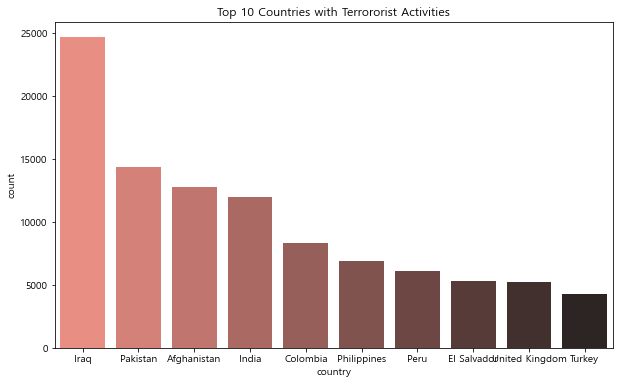

In [319]:
plt.figure(figsize=(10,6))
sns.countplot(top_10_country_data['country_txt'], order=top_10_country_data['country_txt'].value_counts().index, palette='dark:salmon_r')
plt.title('Top 10 Countries with Terrororist Activities')
plt.xlabel('country')
plt.ylabel('count')
plt.show();

- 1970년부터 2017년 사이 Iraq, Pakistan, Afghanistan, India 등의 순서로 가장 많은 테러가 발생 했다.

```
문제3)
• 문제2의 전 세계 테러가 일어난 횟수별 상위 10위 국가에 대해
• 국가별로 사망자 수와 부상자 수를 구분하여 시각화하시오.
• 만약 국가별로 다른 국가와 사망자수, 부상자수의 특성이 다른 국가들이
있다면 시각화에 신경을 쓰세요.
• 즉, 어떤 국가는 테러횟수와 사상자(사망자수+부상자수)가 비슷한 경우가
있고, 또 어떤 국가는 테러횟수에 비해 사상자수가 많은 경우가 있을 겁니다
```

In [134]:
top_10_country_index = terror_data['country_txt'].value_counts().head(10).index

In [135]:
top_10_country_data = terror_data[terror_data['country_txt'].isin(top_10_country_index)]
top_10_country_data.head(1)

,eventid,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,...,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,ishostkid,nhostkid,count
2,197001000001,1970,1,0,0,NaN,160,Philippines,5,Southeast Asia,...,0.0,NaN,NaN,0,NaN,NaN,NaN,0.0,NaN,1


In [147]:
temp = top_10_country_data.groupby(by='country_txt')[['nkill','nwound','count']].sum()
temp

,nkill,nwound,count
country_txt,,,
Afghanistan,39384.0,44277.0,12731
Colombia,14698.0,10328.0,8306
El Salvador,12053.0,5062.0,5320
India,19341.0,28980.0,11960
Iraq,78589.0,134690.0,24636
Pakistan,23822.0,42038.0,14368
Peru,12771.0,4078.0,6096
Philippines,9559.0,13367.0,6908
Turkey,6888.0,9899.0,4292


In [157]:
temp['avg_human_damage'] = temp['nkill']+temp['nwound'] / temp['count']
temp

,nkill,nwound,count,avg_human_damage
country_txt,,,,
Afghanistan,39384.0,44277.0,12731,39387.477889
Colombia,14698.0,10328.0,8306,14699.243438
El Salvador,12053.0,5062.0,5320,12053.951504
India,19341.0,28980.0,11960,19343.423077
Iraq,78589.0,134690.0,24636,78594.467202
Pakistan,23822.0,42038.0,14368,23824.925807
Peru,12771.0,4078.0,6096,12771.668963
Philippines,9559.0,13367.0,6908,9560.935003
Turkey,6888.0,9899.0,4292,6890.306384


In [126]:
top_10_country_data.groupby(by='country_txt')['eventid'].count().sort_values(ascending=False)
top_10_country_data['country_txt'].value_counts()

country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: eventid, dtype: int64

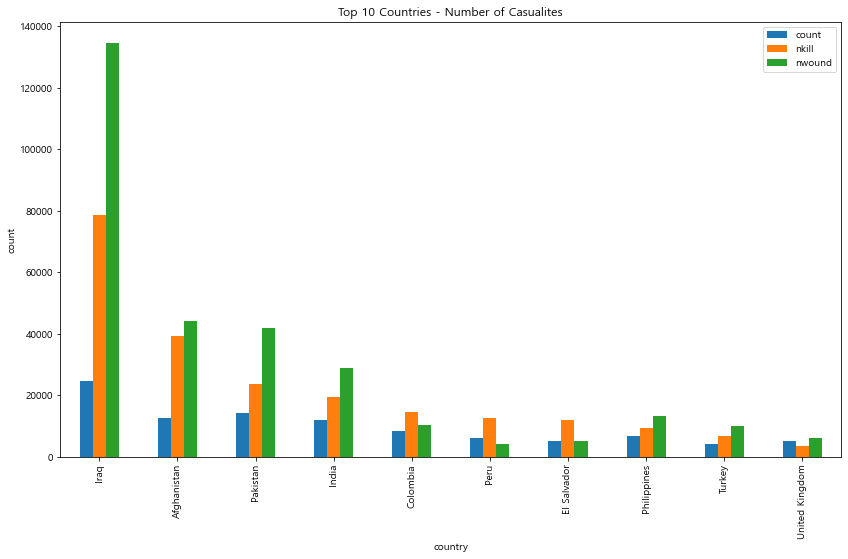

In [136]:
top_10_country_data.groupby(by='country_txt')[['count','nkill','nwound']].sum().sort_values('nkill', ascending=False).plot(kind='bar', figsize=(14,8))
plt.title('Top 10 Countries - Number of Casualites')
plt.xlabel('country')
plt.ylabel('count')
plt.show();

In [183]:
top_10_country_data['attacktype1_txt'].value_counts()

Bombing/Explosion                      51529
Armed Assault                          22708
Assassination                          10857
Hostage Taking (Kidnapping)             6086
Facility/Infrastructure Attack          3880
Unknown                                 3726
Hostage Taking (Barricade Incident)      490
Unarmed Assault                          378
Hijacking                                198
Name: attacktype1_txt, dtype: int64

<AxesSubplot:xlabel='attacktype1_txt'>

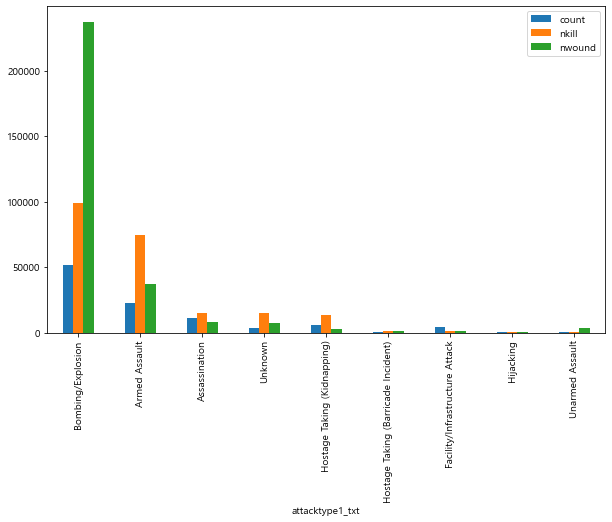

In [212]:
top_10_country_data.groupby('attacktype1_txt')[['count','nkill','nwound']].sum().sort_values('nkill', ascending=False).plot(kind='bar', figsize=(10,6))

In [188]:
top_10_country_data.groupby('country_txt')['attacktype1_txt'].value_counts().nlargest(10)

country_txt  attacktype1_txt  
Iraq         Bombing/Explosion    18286
Pakistan     Bombing/Explosion     7613
Afghanistan  Bombing/Explosion     6245
India        Bombing/Explosion     4825
Pakistan     Armed Assault         3859
India        Armed Assault         3184
Iraq         Armed Assault         3155
Colombia     Bombing/Explosion     3128
Peru         Bombing/Explosion     3115
Afghanistan  Armed Assault         2877
Name: attacktype1_txt, dtype: int64

In [350]:
top_10_country_data[top_10_country_data['country_txt'].isin(['Iraq','Afghanistan','Pakistan','India'])].groupby('country_txt')[['attacktype1_txt']].value_counts()

<AxesSubplot:ylabel='country_txt,attacktype1_txt'>

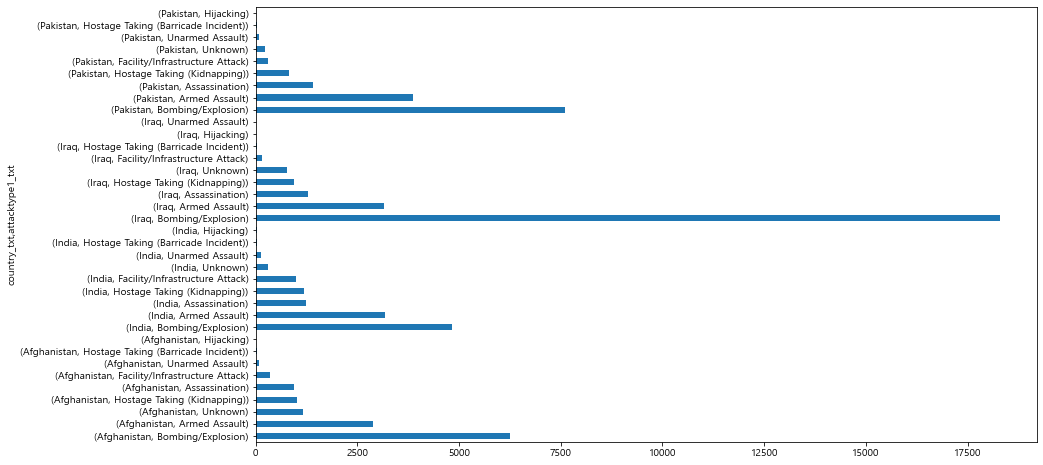

In [218]:
top_10_country_data[top_10_country_data['country_txt'].isin(['Iraq','Afghanistan','Pakistan','India'])].groupby('country_txt')['attacktype1_txt'].value_counts().\
plot(kind='barh', figsize=(14,8))

- 이라크, 아프가니스탄, 파키스탄, 인도의 경우 테러 건수에 비해 인명피해(사망+부상)의 피해가 훨씬 더 크다.
- 이 4개 국가에선 큰 사상자를 만드는 Bombing/Explosion과 Armed Assault 발생 건수가 훨씬 많다.

```
문제4)
• 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽,
북아메리카, 동아시아 지역으로 구분하여
• 각 지역별로 테러 공격 형태, 사망자와 사상자의 수 등에 대해 각 지역별로
특성들이 있는지를 확인하세요
• 여러분들은 데이터를 충분히 관찰하며서 신중하게 결과를 정리하세요
```

In [139]:
terror_data['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

<AxesSubplot:>

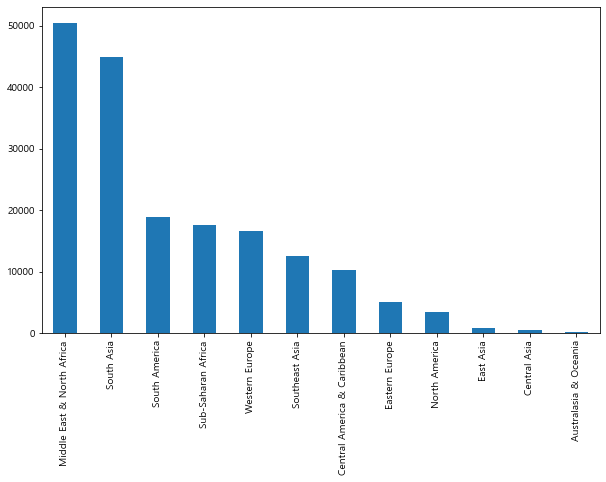

In [159]:
terror_data['region_txt'].value_counts().plot(kind='bar', figsize=(10,6))

<AxesSubplot:xlabel='region_txt'>

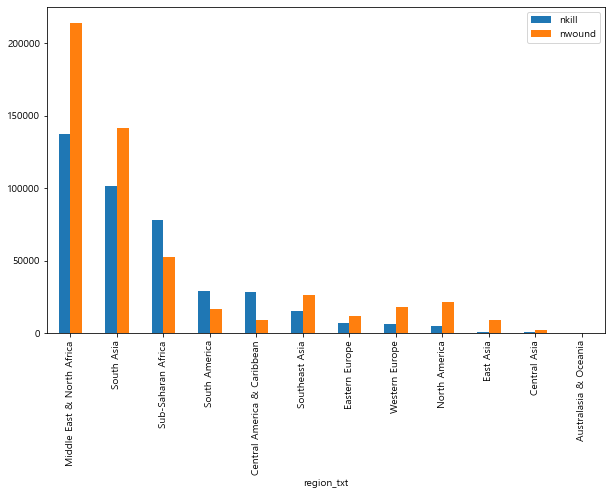

In [278]:
terror_data.groupby('region_txt')[['nkill','nwound']].sum().sort_values('nkill', ascending=False).plot(kind='bar', figsize=(10,6))

In [268]:
pd.DataFrame(terror_data[terror_data['region_txt'].isin(['Middle East & North Africa', 'South Asia','South America','Sub-Saharan Africa'])]\
             .groupby('region_txt')['attacktype1_txt'].value_counts())

attacktype1_txt
region_txt                 attacktype1_txt                                     
Middle East & North Africa Bombing/Explosion                              30908
                           Armed Assault                                   9273
                           Assassination                                   4206
                           Hostage Taking (Kidnapping)                     2666
                           Unknown                                         1891
                           Facility/Infrastructure Attack                  1115
                           Unarmed Assault                                  177
                           Hijacking                                        138
                           Hostage Taking (Barricade Incident)              100
South America              Bombing/Explosion                               9039
                           Armed Assault                                   3875
                           Assassination                                   2745
                           Hostage Taking (Kidnapping)                     1414
                           Facility/Infrastructure Attack                   803
                           Unknown                                          754
                           Hostage Taking (Barricade Incident)              234
                           Hijacking                                         67
                           Unarmed Assault                                   47
South Asia                 Bombing/Explosion                              21246
                           Armed Assault                                  11404
                           Assassination                                   4301
                           Hostage Taking (Kidnapping)                     3277
                           Facility/Infrastructure Attack                  2189
                           Unknown                                         2021
                           Unarmed Assault                                  323
                           Hostage Taking (Barricade Incident)              120
                           Hijacking                                         93
Sub-Saharan Africa         Armed Assault                                   6004
                           Bombing/Explosion                               5557
                           Hostage Taking (Kidnapping)                     1872
                           Assassination                                   1638
                           Unknown                                         1355
                           Facility/Infrastructure Attack                   810
                           Hijacking                                        136
                           Hostage Taking (Barricade Incident)               95
                           Unarmed Assault                                   83

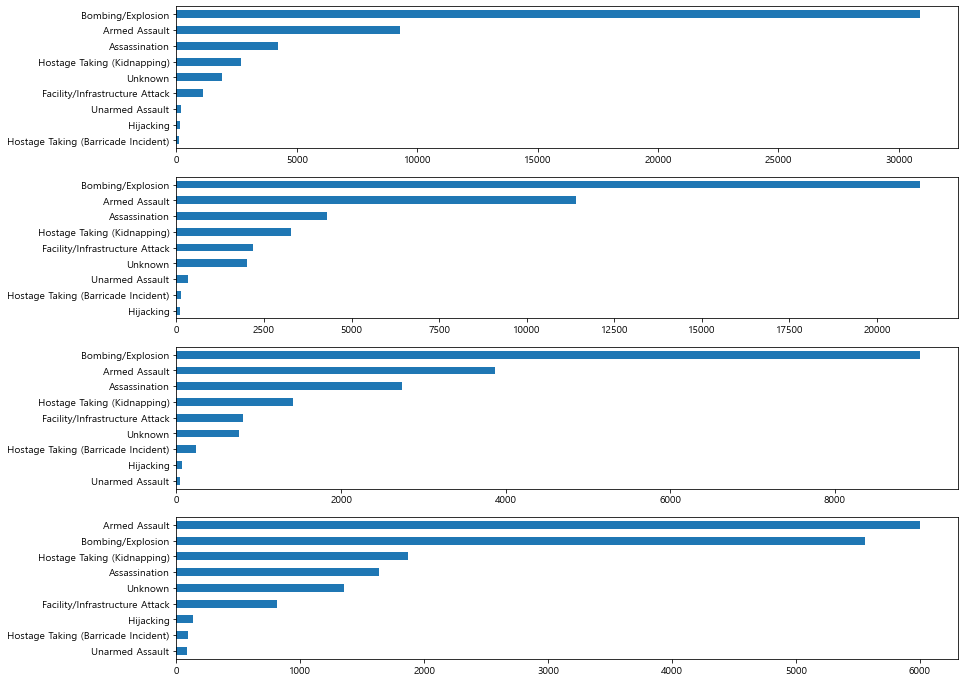

In [295]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=1)

terror_data[terror_data['region_txt'] == 'Middle East & North Africa']['attacktype1_txt'].value_counts().sort_values().plot(kind='barh',ax=axes[0], figsize=(14, 12));
terror_data[terror_data['region_txt'] == 'South Asia']['attacktype1_txt'].value_counts().sort_values().plot(kind='barh',ax=axes[1]);
terror_data[terror_data['region_txt'] == 'South America']['attacktype1_txt'].value_counts().sort_values().plot(kind='barh', ax=axes[2]);
terror_data[terror_data['region_txt'] == 'Sub-Saharan Africa']['attacktype1_txt'].value_counts().sort_values().plot(kind='barh', ax=axes[3]);
# terror_data[terror_data['region_txt'] == 'Western Europe']['attacktype1_txt'].value_counts().plot(kind='bar');

```
문제5)
• 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽,
북아메리카, 동아시아 지역으로 구분하여 진행한 문제4번에 대해
• 문제1번에서 특정 지은 시기를 기준으로 다시 분리하여 테러의 양상을
분석해 보시오.
• 그리고 본인의 분석결과를 제시하시오
```

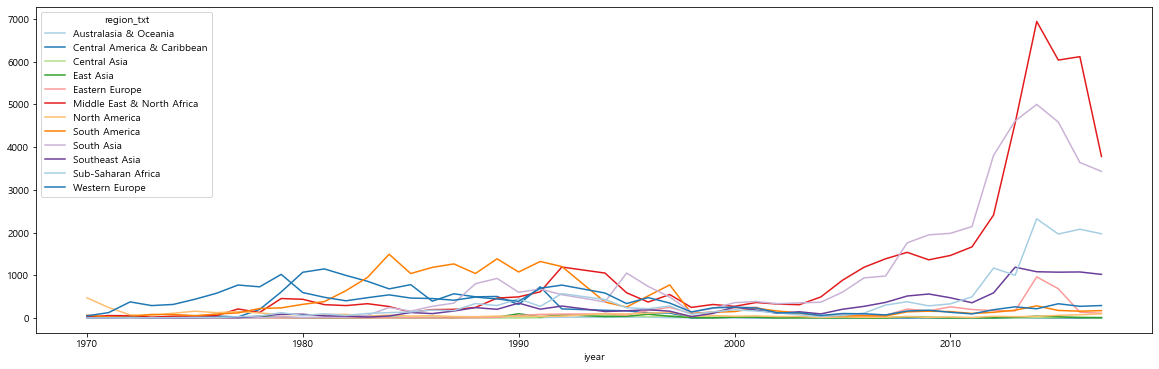

In [307]:
terror_region_by_year = pd.crosstab(terror_data.iyear, terror_data.region_txt)
terror_region_by_year.plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.show();

- 1970년대 주로 서유럽에서 발생한 테러는 1980년대에는 라틴 아메리카, 1990년대 이후에는 중동·북아프리카·남아시아에서 발생

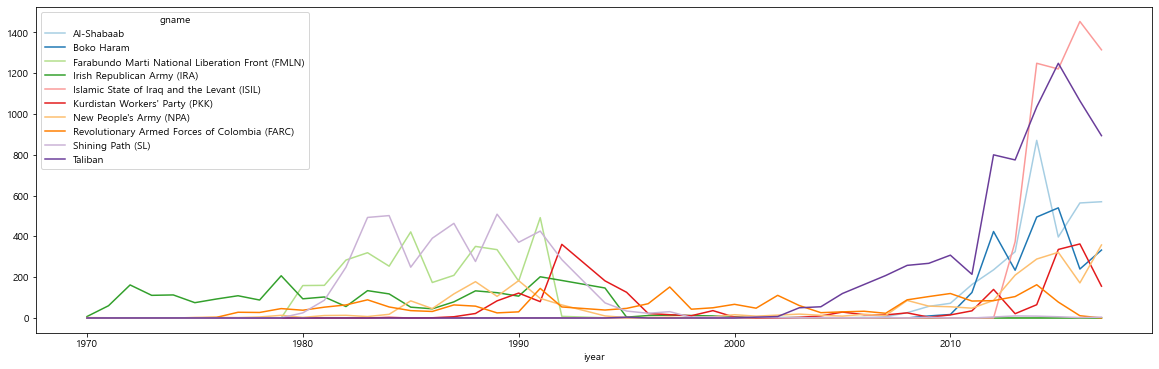

In [305]:
top_groups10 = terror_data[terror_data['gname'].isin(terror_data['gname'].value_counts()[1:11].index)]
terror_group_by_year = pd.crosstab(top_groups10.iyear, top_groups10.gname)
terror_group_by_year.plot(color=sns.color_palette('Paired', 12))
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.show();

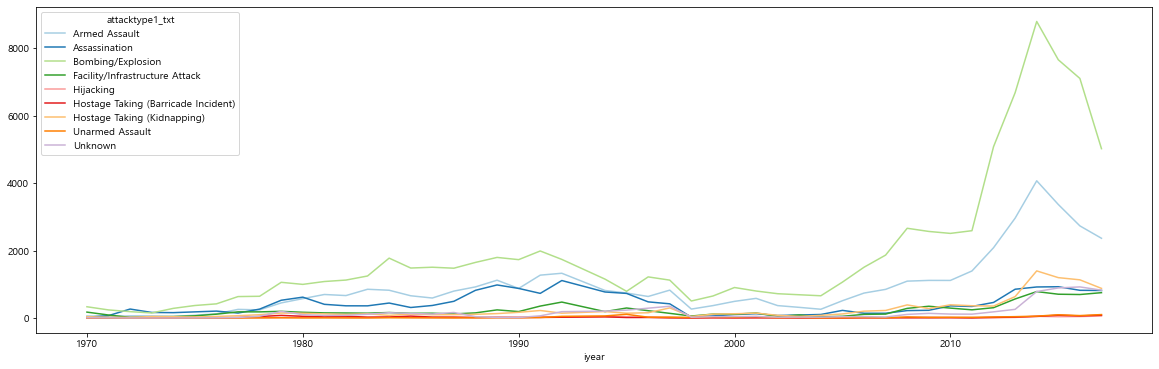

In [317]:
attack_type_by_year = pd.crosstab(terror_data.iyear, terror_data.attacktype1_txt)
attack_type_by_year.plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.show();

- 2011년 아랍의 봄 이후 Taliban과 새롭게 등장한 ISIS(ISIL) 등의 조직들의 활발한 테러 활동과 세력 확장으로 Middle East & North Africa, South Asia, Sub-Saharan Africa 지역에서의 테러 건수가 급증하였다.

```
문제6)
• 중동&북아프리카, 남아시아, 서유럽, 남동아시아, 동유럽, 북아메리카,
동아시아 지역으로 구분하여
• 70년대, 80년대, 90년대, 2000년대, 2010년대로 구분하여 특성을 분석해
보시오.
```

In [329]:
terror_data['year_range'] = pd.cut(terror_data['iyear'], bins=[1970, 1980, 1990, 2000, 2010, 2020], right=False, labels=['1970s', '1980s', '1990s', '2000s', '2010s'])
terror_data.head()

,eventid,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,...,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,ishostkid,nhostkid,count,year_range
0,197000000001,1970,7,2,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,0,NaN,NaN,NaN,0.0,NaN,1,1970s
1,197000000002,1970,0,0,0,NaN,130,Mexico,1,North America,...,NaN,NaN,0,NaN,NaN,NaN,1.0,1.0,1,1970s
2,197001000001,1970,1,0,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,0,NaN,NaN,NaN,0.0,NaN,1,1970s
3,197001000002,1970,1,0,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,1,NaN,NaN,NaN,0.0,NaN,1,1970s
4,197001000003,1970,1,0,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,1,NaN,NaN,NaN,0.0,NaN,1,1970s


In [330]:
terror_data['year_range'].value_counts()

2010s    86815
1980s    31160
1990s    28762
2000s    25040
1970s     9914
Name: year_range, dtype: int64

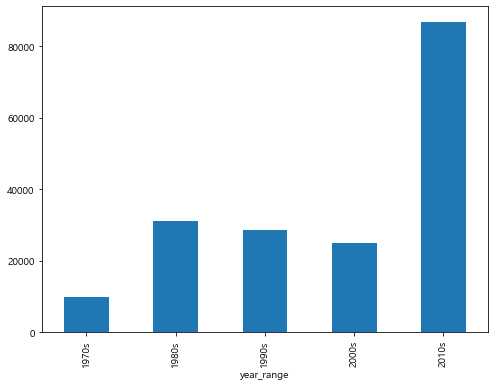

In [339]:
terror_data.groupby('year_range')['count'].sum().plot(kind='bar', figsize=(8,6));

In [ ]:
terror_data.groupby('year_range')['gname'].value_counts().plot(kind='bar')

```
문제8
• 불특정 민간인을 대상으로 한 테러는 “악”이라고 할 수 있습니다.
• 이런 테러의 어둡고 무서운 면을 강조할 수 있는 방법을 고민하여 데이터를
분석하고 시각화하여 제시하시오.
```

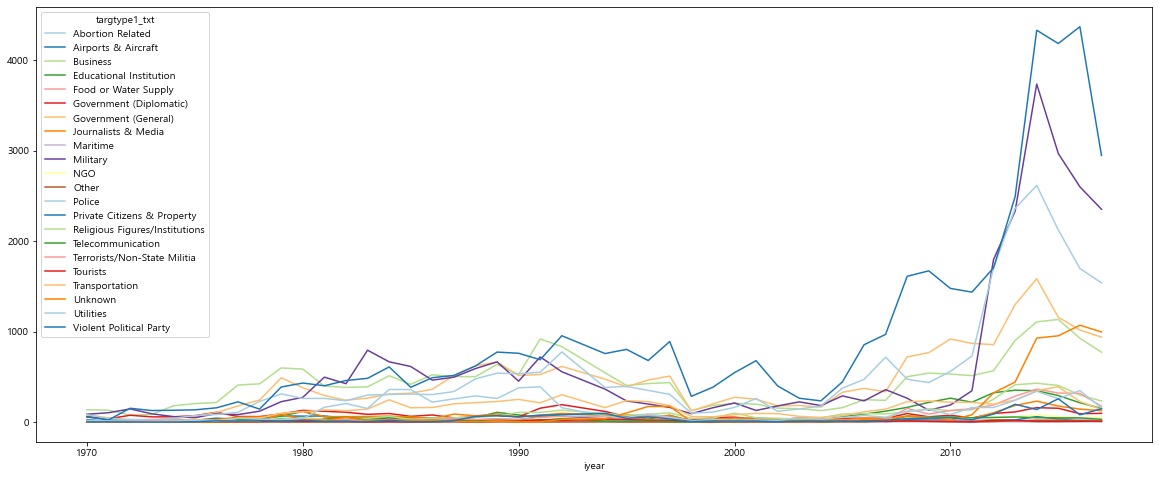

In [345]:
target_type_by_year = pd.crosstab(terror_data.iyear, terror_data.targtype1_txt)
target_type_by_year.plot(color=sns.color_palette('Paired', 20))
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show();

In [ ]:
terror_data[]